# Diplomado en Inteligencia Artificial y Data Mining
## Tarea 1 Modulo 2

**Nombre**	:Cristian Leon 

**Profesión** 	:Magister en Ingeniería Informática

**Institución**	:Universidad Andrés Bello

**Ciudad - País** : 	Santiago, Chile

**Correo electrónico**	: cleonfuentes@gmail.com c.lenfuentes@uandresbello.edu

**Modulo 2** : Repaso de Conceptos de Programación.


In [32]:
# importacion de librerias
import numpy as np
import pandas as pd
#solo para subir

# Ejercicio 1
Debe cargar el carchivo en un DataFrame, desplegando la cantidad de registros (filas) y la cantidad de características presentes en la base de datos, debe eliminar del DataFrame las siguientes columnas: **id, fecha_inicio, fecha_ultima_accion, ppei1, ppei2, ppei3 y ppei4**, para aquellas columnas cuyos nombres vengan con espacion en blanco al comienzo, debe quitar esos espacios y se requiere eliminar de los valores almacenados en la columna **gen** el carácter punto con el cual vienen algunos géneros

In [33]:
#carga datos
df = pd.read_excel("SERNAC_bbdd-satisfaccion-fin-reclamos.xlsx")
#df = pd.read_csv("SERNAC_bbdd-satisfaccion-fin-reclamos.csv")
num_filas, num_columnas = df.shape
print(f' cantidad de filas {num_filas} y de columnas {num_columnas}')


 cantidad de filas 4793 y de columnas 27


Eliminacion de columnas solicitadas

In [34]:
df = df.drop('id',axis = 1)
df = df.drop('fecha_inicio',axis = 1)
df = df.drop('fecha_ultima_accion',axis = 1)
df = df.drop('ppei1',axis = 1)
df = df.drop('ppei2',axis = 1)
df = df.drop('ppei3',axis = 1)
df = df.drop('ppei4',axis = 1)

num_filas, num_columnas = df.shape
print(f' canlidad de filas {num_filas} y de columnas {num_columnas}')

 canlidad de filas 4793 y de columnas 20


No se visualizan nombres de columnas con espacion blancos al inicio.
De igual forma lo siguiente quita los blancos a la derecha e izquierda

In [35]:
for text in ['p2','gen', 'region', 'educ','edad']:
  df[text] = df[text].str.replace('.', '')

df.head(4)

,mes_reclamo,pex,p1a,p1b,pinst,p2,p3,p4a,p4b,p4c,nps,pgen,gen,region,educ,edad,ocup,ingreso,sitdisc,indg
0,1,5,5,4,5,Solucionó parcialmente su Reclamo,El SERNAC me envió información con la frecuenc...,7,5,6,5,5,Masculino,Región de Valparaíso,Superior universitaria completa,65 años o más,Jubilado/a,Entre $600.000 y $1.099.000,No,No
1,1,1,1,1,1,No solucionó su Reclamo,Me hubiera gustado recibir información con may...,1,1,7,1,5,Femenino,Región de Valparaíso,Superior universitaria completa,30 a 44 años,Asalariado/a,$1.100.000 o más,No,No
2,1,4,2,2,2,No solucionó su Reclamo,El SERNAC me envió información con la frecuenc...,3,3,3,5,2,Femenino,Región Metropolitana de Santiago,Superior universitaria completa,45 a 64 años,Asalariado/a,Menos de $300.000,No,No
3,1,7,7,7,7,Solucionó completamente su Reclamo,El SERNAC me envió información con la frecuenc...,7,7,7,10,7,Femenino,Región del Libertador General Bernardo O’Higgins,Superior universitaria completa,30 a 44 años,Asalariado/a directivo/a o gerente,$1.100.000 o más,No,No


# Ejercicio 2
Implemente una función de Python que reciba por parámetro un DataFrame y el género, para este último los valores posibles son: Masculino, Femenino, No binario, Otro y Todos. esta función debe devolver el NPS para el género solicitado, si es Todos devolvera el NPS considerando todos los registros.

In [36]:
#funcion que entrega tipo NPS
def estado(m):
  if m <= 6:
    return 'detractores'
  else:
      if 7>= m <=8:
        return 'pasivos'
      else:
        return 'promotores'

df['Estado'] = df.apply(lambda x:estado(x["nps"]),axis=1)

def funcion_NPS(dff,genero):
    total = 0
    resultado = 0
    if genero not in ['Masculino', 'Femenino', 'No binario', 'Otro', 'Todos']:
        raise ValueError("El valor debe estar entre 'Masculino.', 'Femenino.', 'No binario', 'Otro', 'Todos'")

    if genero =='Todos':
      filtered_df = dff
    else:
      filtered_df = dff[df.iloc[:, 12] == genero]

    total = len(filtered_df)
    detera = len(filtered_df[filtered_df.iloc[:, 20]== 'detractores'])
    promot = len(filtered_df[filtered_df.iloc[:, 20]== 'promotores'])
    resultado = abs((promot - detera) / total)
    return resultado

for aBuscar in ['Masculino', 'Femenino', 'No binario', 'Otro', 'Todos']:
  valor = funcion_NPS(df,aBuscar)
  print(f'El NPS de "{aBuscar}" es:{valor*100:05.2f}%')


El NPS de "Masculino" es:16.33%
El NPS de "Femenino" es:16.79%
El NPS de "No binario" es:25.00%
El NPS de "Otro" es:37.50%
El NPS de "Todos" es:16.15%


# Ejercicio 3
Muestre la cantidad de registros para cada categoría de edad y nivel de sueldo disponible, donde la categoría de edad estará en las filas y el sueldo en las columnas

In [37]:
datos = df.groupby(['edad','ingreso'])['edad'].count()

print('Edad \\ Ingreso \t $1.100.000 o más \t Entre $300.001 y $399.999 \t Entre $400.000 y $599.999 \t Entre $600.000 y $1.099.000 \t Menos de $300.000')
print(f'18 a 29 años  \t\t\t {datos.iloc[0]} \t\t\t {datos.iloc[1]} \t\t\t\t {datos.iloc[2]} \t\t\t\t{datos.iloc[3]} \t\t\t\t{datos.iloc[4]}')
print(f'30 a 44 años  \t\t\t{datos.iloc[5]} \t\t\t {datos.iloc[6]} \t\t\t\t{datos.iloc[7]} \t\t\t\t{datos.iloc[8]} \t\t\t\t{datos.iloc[9]}')
print(f'45 a 64 años  \t\t\t{datos.iloc[10]} \t\t\t{datos.iloc[11]} \t\t\t\t{datos.iloc[12]} \t\t\t\t{datos.iloc[13]} \t\t\t\t{datos.iloc[14]}')
print(f'65 años o más \t\t\t{datos.iloc[15]} \t\t\t {datos.iloc[16]} \t\t\t\t{datos.iloc[17]} \t\t\t\t{datos.iloc[18]} \t\t\t\t {datos.iloc[19]}')


Edad \ Ingreso 	 $1.100.000 o más 	 Entre $300.001 y $399.999 	 Entre $400.000 y $599.999 	 Entre $600.000 y $1.099.000 	 Menos de $300.000
18 a 29 años  			 86 			 31 				 67 				118 				137
30 a 44 años  			868 			 82 				260 				519 				177
45 a 64 años  			803 			107 				269 				498 				211
65 años o más 			162 			 54 				121 				147 				 76


## Ejercicio 4
Despliegue de los top "N" Regiones que presentan mayor cantidad de reclamos en que el cliente "No solucionó su reclamo" ordenadas de mayor a menor, debe mostrar el nombre de la región junto con la cantidad de observaciones que cumplan con lo requerido, N es un valor que si se cambia en el código debe devolver la cantidad que se requiere.

In [42]:
def muestra_Top(n):
    df_filtrado = df[df['p2'] == 'No solucionó su Reclamo']
    df_filtrado = df_filtrado['region'].value_counts()
    return df_filtrado.head(n)

resultado = muestra_Top(3)
print(resultado)


region
Región Metropolitana de Santiago    1093
Región de Valparaíso                 217
Región del Biobío                    145
Name: count, dtype: int64


# Ejercicio 5
Desarrolle una funcion que reciba por parámetro un DataFrame y el nombre de una columna que pertenezca a este, para datos discretos puede ser: **gen, region, educ, edad, ocup, ingreso, sitdics o indg**. La funcion debe mostrar un gráfico de barras con la cantidad de reclamos completamente solucionados para cada categoría de la columna recibida por parámetros.

gen


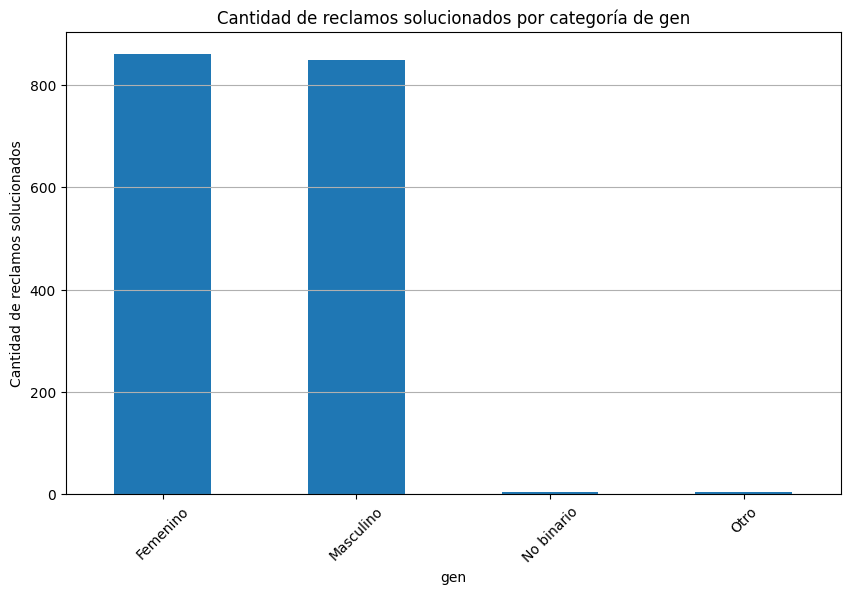

region


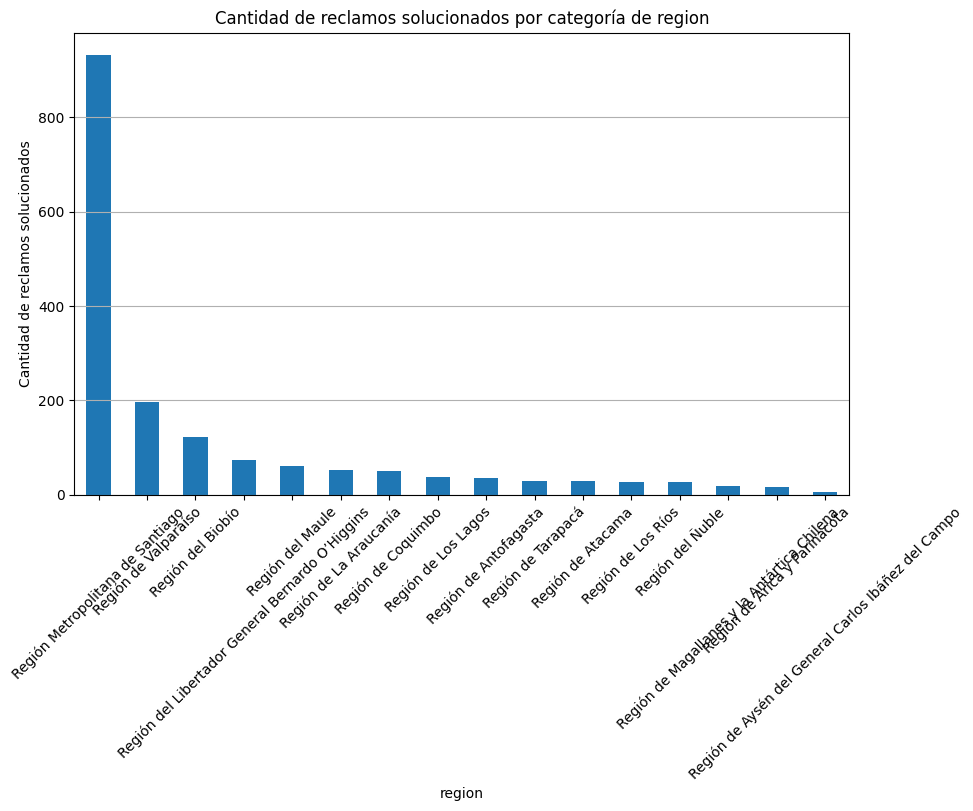

educ


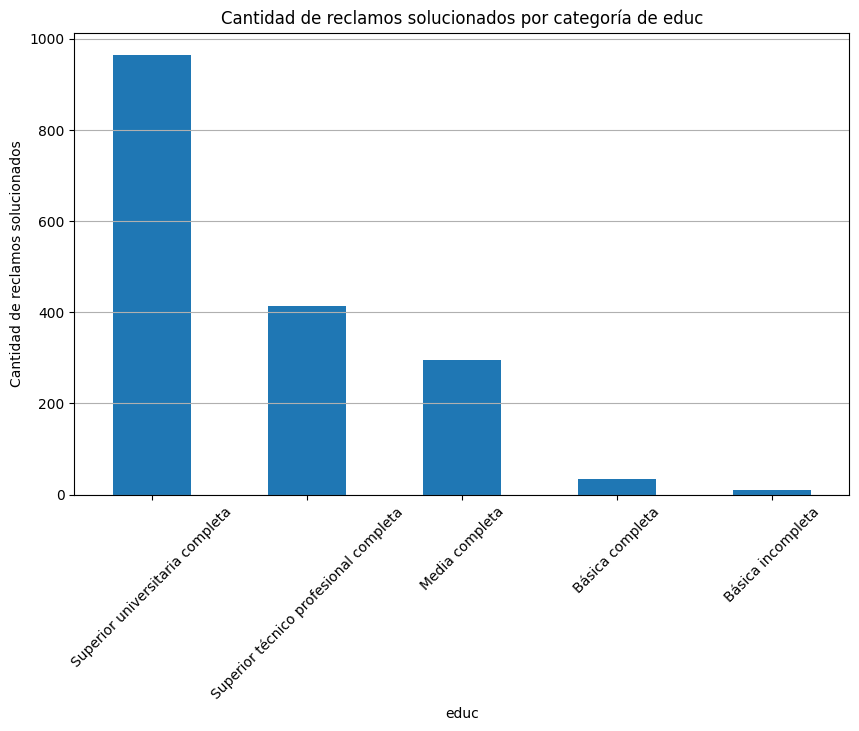

edad


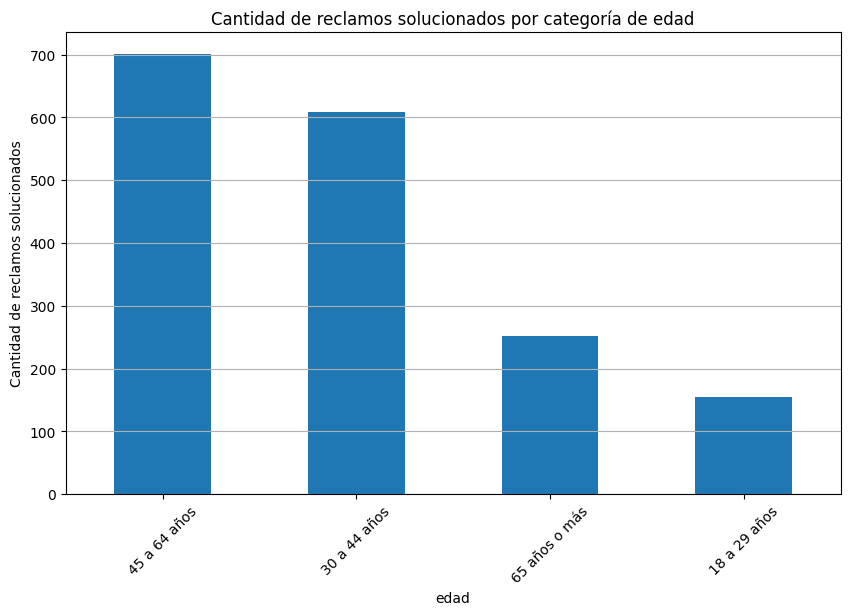

ocup


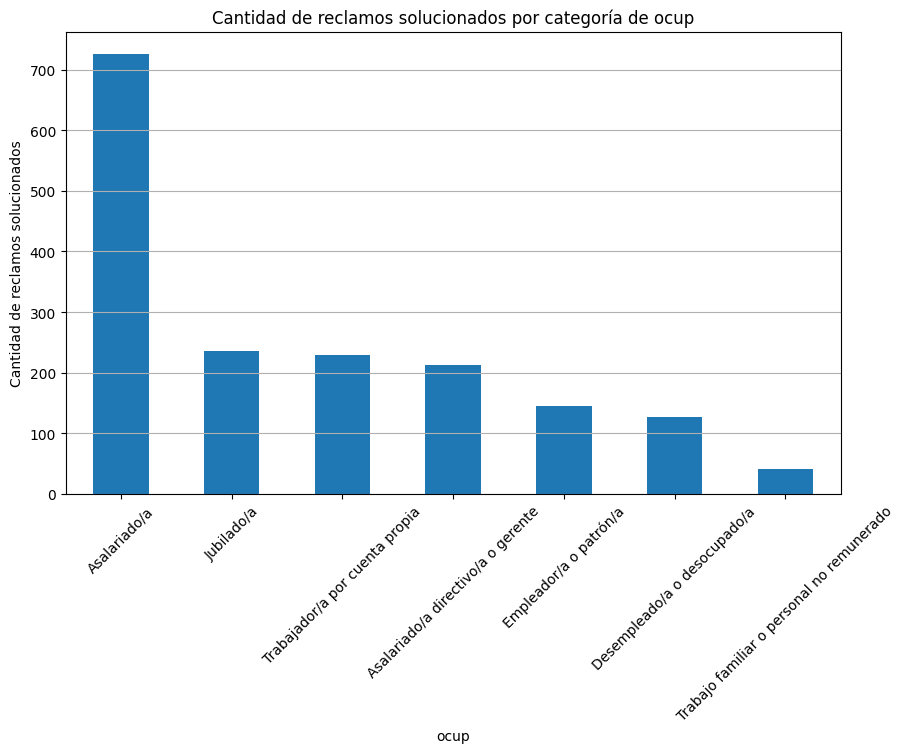

ingreso


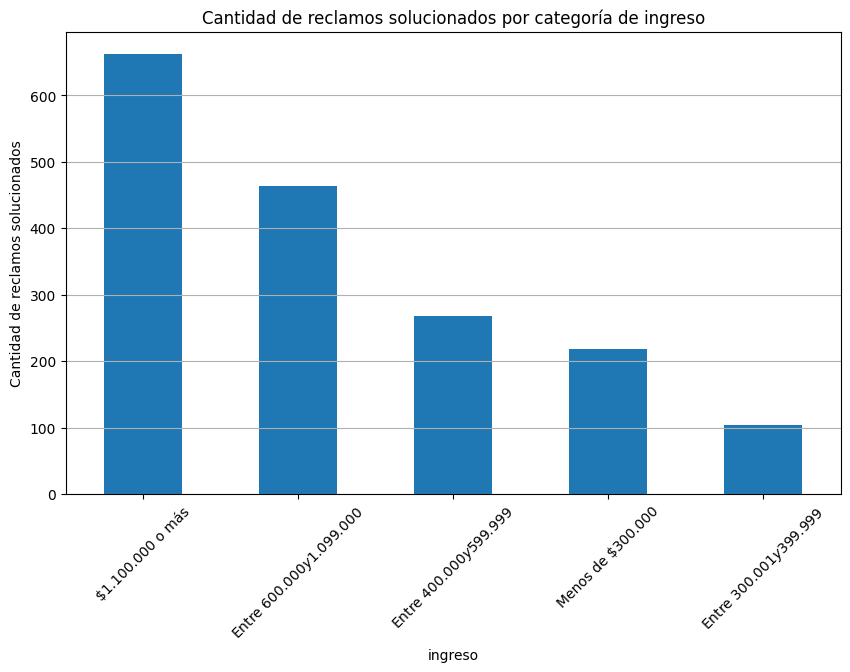

sitdisc


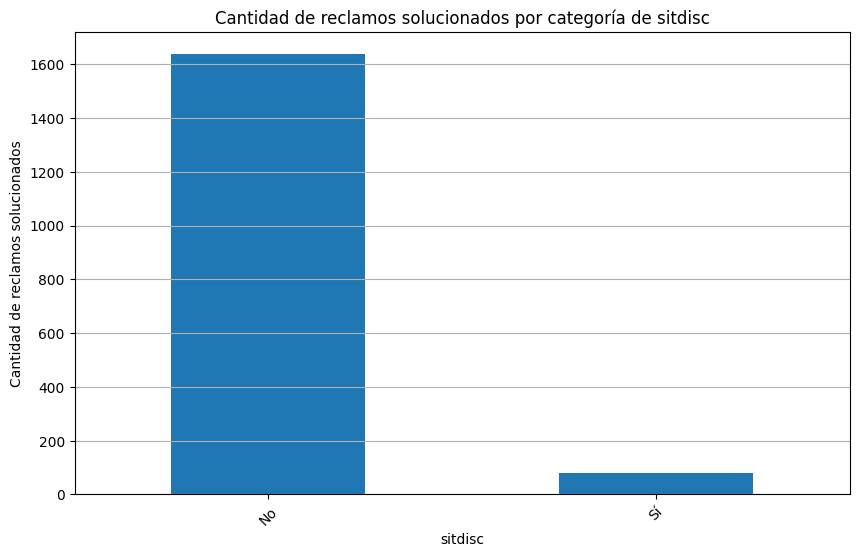

indg


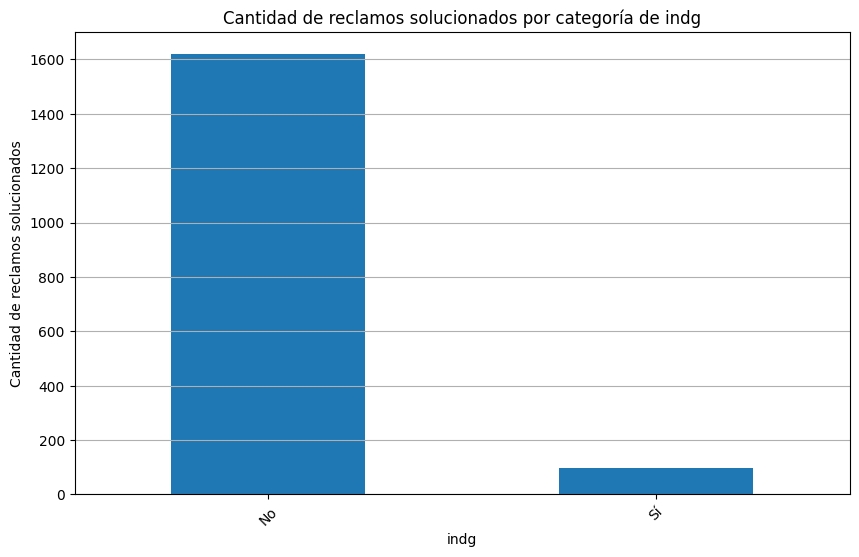

In [38]:
import matplotlib.pyplot as plt

def grafico_reclamos_solucionados(dff, columna):
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no se encuentra en el DataFrame.")

    columnas_permitidas = ['gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc', 'indg']
    if columna not in columnas_permitidas:
        raise ValueError(f"La columna '{columna}' no es una columna permitida.")
    
    df_filtrado = dff[dff['p2'] == 'Solucionó completamente su Reclamo']
    reclamos_por_categoria = df_filtrado[columna].value_counts()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    reclamos_por_categoria.plot(kind='bar')
    plt.title(f'Cantidad de reclamos solucionados por categoría de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Cantidad de reclamos solucionados')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

for nombre in ['gen', 'region', 'educ', 'edad', 'ocup', 'ingreso', 'sitdisc', 'indg']:
    print(nombre)
    grafico_reclamos_solucionados(df, nombre)

# Ejercicio 6
Para el mes que se genera la mayor candidad de reclamos, independiente si hay o no solucion, muestr en forma ordenada para cada genero de mayor a menor cantidad de reclamos realizada por clientes con nivel de estudios "Superior universitaria completa" y compare esta cantidad con aquellos con vivel de estudios "Básica completa", concluya a que puede asociar este reesultado

In [ ]:
mes_mas_reclamos = df['mes_reclamo'].value_counts().idxmax()

df_mes = df[df['mes_reclamo'] == mes_mas_reclamos]

reclamos_superior = df_mes[df_mes['educ'] == 'Superior universitaria completa']['gen'].value_counts()
reclamos_basica = df_mes[df_mes['educ'] == 'Básica completa']['gen'].value_counts()


print(f"Reclamos en el mes con más reclamos ({mes_mas_reclamos}):")

print("\nSuperior universitaria completa:")
print(reclamos_superior.sort_values(ascending=False))

print("\nBásica completa:")
print(reclamos_basica.sort_values(ascending=False))


comparacion = pd.DataFrame({
    'Superior universitaria completa.': reclamos_superior,
    'Básica completa.': reclamos_basica
}).fillna(0)

print("\nComparación de reclamos entre niveles educativos:")
print(comparacion)

Reclamos en el mes con más reclamos (1):

Superior universitaria completa:
gen
Masculino     186
Femenino      165
Otro            4
No binario      2
Name: count, dtype: int64

Básica completa:
gen
Femenino     4
Masculino    3
Name: count, dtype: int64

Comparación de reclamos entre niveles educativos:
            Superior universitaria completa.  Básica completa.
gen                                                           
Femenino                                 165               4.0
Masculino                                186               3.0
No binario                                 2               0.0
Otro                                       4               0.0


# Análisis

1. Se visualiza que el mes con más reclamos corresponde a enero, estimo que esta asociado a las comprar realizadas por navidad.
2. Sobre los reclamos segun nivel de educacion, ademas de ser notorio, podemos estimar que a mayor nivel de educacion, mas empoderamiento en realizar reclamos.
3. No se visualiza una diferencia de reglamos entre los generos masculino y femenino, con nivel de estucios universitacios. Pero se mantiene la cantidad de reclamos en comparacion con un nivel de educacion básica completa.

# Cristian León
# Magister en ingeníeria informática